In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_theme(style='dark')

In [47]:
df=pd.read_csv('movies_data.csv')
len( df)

7994

In [48]:
df.shape[1],list(df.columns)

(11,
 ['name',
  'genres',
  'type',
  'rating',
  'no_of_votes',
  'meta_score',
  'release_date',
  'gross',
  'budget',
  'countries',
  'url'])

In [49]:
print("Rows: {} & Columns: {}".format(df.shape[0], df.shape[1]))
#27*300=8100

Rows: 7994 & Columns: 11


In [50]:
df.head()

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591K,NaN,"September 28, 2013 (United States)",NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6.8K,34.0,"February 7, 2025 (United States)","$17,235,040","$18,000,000 (estimated)",United States,https://www.imdb.com/title/tt30788842/?ref_=sr...
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107K,49.0,"February 10, 1995 (United States)","$18,636,537","$32,000,000 (estimated)","United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19K,NaN,"February 7, 2021 (United States)",NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15K,NaN,"October 13, 2023 (United States)",NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...


In [57]:
unique_values =df.nunique()
unique =pd.DataFrame({'columns':unique_values.index, 'unique values':unique_values.values})
unique.reset_index(drop=True ,inplace=True)
unique.style.background_gradient(cmap='Blues_r') 
# Jinja2

,columns,unique values
0,name,4996
1,genres,3417
2,type,2
3,rating,81
4,no_of_votes,1262
5,meta_score,86
6,release_date,4003
7,gross,2197
8,budget,448
9,countries,622


In [53]:
def percentage(x):
    percent= (x /len(df)) *  100
    
    return round(percent,2)

In [54]:
missing_value=df.isnull().sum()
missing_df =pd.DataFrame({'columns':missing_value.index, 'missing_values':missing_value.values})
missing_df['percentage'] = missing_df['missing_values'].apply(percentage)
missing_df=missing_df.sort_values(by='percentage', ascending=False)
missing_df.reset_index(drop=True ,inplace=True)
missing_df.style.background_gradient(cmap='Blues')

,columns,missing_values,percentage
0,budget,4757,59.510000
1,gross,4461,55.800000
2,meta_score,4348,54.390000
3,no_of_votes,244,3.050000
4,rating,244,3.050000
5,release_date,58,0.730000
6,countries,36,0.450000
7,type,0,0.000000
8,genres,0,0.000000
9,name,0,0.000000


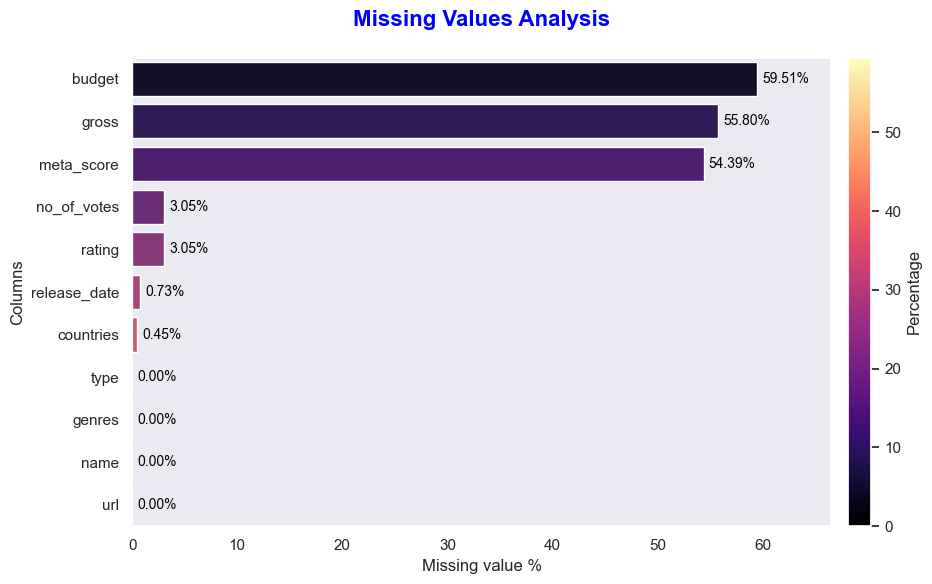

In [55]:
# Sắp xếp dữ liệu theo 'percentage' để biểu đồ dễ đọc hơn
missing_df_sorted = missing_df.sort_values(by='percentage', ascending=False)

# Tạo một mảng màu dựa trên giá trị 'percentage'
norm = plt.Normalize(missing_df_sorted['percentage'].min(), missing_df_sorted['percentage'].max())
sm = plt.cm.ScalarMappable(cmap='magma', norm=norm)
sm.set_array([])

# Tạo biểu đồ thanh ngang
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    data=missing_df_sorted,
    y='columns',
    hue='columns',
    x='percentage',
    palette='magma',
    dodge=False,  # Đảm bảo các thanh không bị tách ra
    legend=False  # Tắt chú thích
)
plt.xlim(0, missing_df_sorted['percentage'].max() + 7)

# Thêm giá trị ở cuối mỗi thanh
for index, value in enumerate(missing_df_sorted['percentage']):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', fontsize=10, color='black')

# Thêm nhãn và tiêu đề
plt.title("Missing Values Analysis\n", fontsize=16, fontweight='bold', color='blue')
plt.xlabel("Missing value %", fontsize=12)
plt.ylabel("Columns", fontsize=12)

# Thêm thanh chú thích (color bar)
cbar = plt.colorbar(sm, ax=bars.figure.axes[-1], orientation='vertical', pad=0.02)
cbar.set_label('Percentage', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout();
plt.show();